### 1. **Análisis de Series Temporales**
**Resumen:** El análisis de series temporales permite identificar patrones, tendencias y estacionalidades en los precios y volúmenes de ventas de aguacates a lo largo del tiempo.

1. **Descomposición de Series Temporales de Precios:** 
   - **Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.

In [10]:
%run './Avocado_EDA.ipynb' 

#Crear df para cada tipo de aguacate
df_conventional = df[df['type'] == 'conventional']
df_organic = df[df['type'] == 'organic']

#Información por tipo de aguacate
print('Aguacate convencional:\n',df_conventional['AveragePrice'].describe(),'\n')
print('Aguacate organico:\n',df_organic['AveragePrice'].describe(),'\n')

Aguacate convencional:
 count    9126.000000
mean        1.158040
std         0.263041
min         0.460000
25%         0.980000
50%         1.130000
75%         1.320000
max         2.220000
Name: AveragePrice, dtype: float64 

Aguacate organico:
 count    9123.000000
mean        1.653999
std         0.363502
min         0.440000
25%         1.420000
50%         1.630000
75%         1.870000
max         3.250000
Name: AveragePrice, dtype: float64 



Las series temporales relacionadas con el precio de aguacate organico: Figure(576x396)


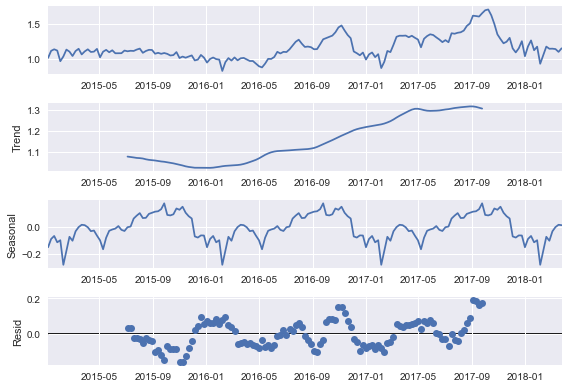

In [11]:
# Selección de las columnas Date y AveragePrice
price_con = df[df['type'] == 'conventional'][['Date', 'AveragePrice']]
price_org = df[df['type'] == 'organic'][['Date', 'AveragePrice']]

# Promedio del precio por día
av_price_org = price_con.groupby(['Date']).mean()
av_price_con = price_org.groupby(['Date']).mean()


# Descompocisón de series temporales utilizando la función seasonal_descompose
prices_time_series_org = sm.seasonal_decompose(av_price_org, model = 'additive', period = 52)
prices_time_series_con = sm.seasonal_decompose(av_price_con, model = 'additive', period = 52)

print('Las series temporales relacionadas con el precio de aguacate organico:',prices_time_series_org.plot())

Las series temporales relacionadas con el precio de aguacate convencional: Figure(576x396)


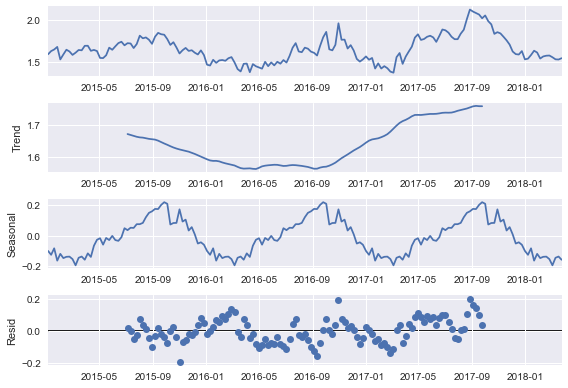

In [12]:
print('Las series temporales relacionadas con el precio de aguacate convencional:',prices_time_series_con.plot())

Se puede observar que obtenemos una tendencia y estacionalidad en septiembre, donde los precios son más elevados comparado con enero. Observamos que 1.405978 es el precio más alto, y 0.440000 es el precio mínimo. Se puede observar una tendencia al alza. 

2. **Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.


In [13]:
# Crear nueva columna region_type para designar una categoría a cada region

# Listas para la clasificación de regiones
cities = ['Albany', 'Atlanta', 'Boise', 'Boston', 'Charlotte', 'Chicago', 'Columbus', 'Denver', 
          'Detroit', 'GrandRapids', 'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas', 'LosAngeles',
          'Louisville', 'Nashville', 'NewYork', 'Orlando', 'Philadelphia', 'Pittsburgh', 'Portland', 
          'Roanoke', 'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle', 'Spokane', 'StLouis', 'Syracuse', 'Tampa']

regions = ['BaltimoreWashington', 'BuffaloRochester', 'CincinnatiDayton', 'DallasFtWorth', 'HarrisburgScranton', 
           'HartfordSpringfield', 'MiamiFtLauderdale', 'NewOrleansMobile', 'NorthernNewEngland', 'PhoenixTucson',
           'RaleighGreensboro', 'RichmondNorfolk', 'WestTexNewMexico']

greaterregions = ['California', 'GreatLakes', 'Midsouth', 'Northeast', 'Plains', 'SouthCentral', 'Southeast', 'West']

# Funcion de clasificación 
def classify_region(region):
    if region in cities:
        return 'City'
    elif region in regions:
        return 'Region'
    elif region in greaterregions:
        return 'GreaterRegion'
    elif region == 'TotalUS':
        return 'TotalUS'
    elif region == 'SouthCarolina':
        return 'State'
    else:
        return 'Unknown'

# Crear la columna 'region_type'
df['region_type'] = df['region'].apply(classify_region)

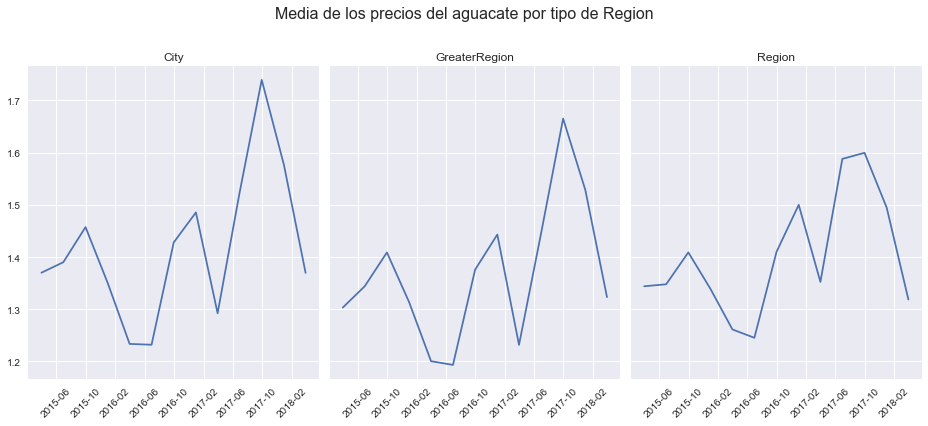

In [14]:
# Subplots según la region
fig, axes = plt.subplots(1,3, figsize=(13, 6), sharex=True, sharey=True)
fig.suptitle("Media de los precios del aguacate por tipo de Region", fontsize=16)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

df_price_region = df.groupby(['region_type', pd.Grouper(key='Date', freq='Q')])['AveragePrice'].mean().reset_index()


# Valore únicos de region_types para la iterar
region_types = df_price_region['region_type'].unique()

# Iterar sobre cada region_type para crear su plot correspondiente
for ax, region_type in zip(axes.flatten(), region_types):
    # Filtrar el DataFrame para region_type
    region_data = df_price_region[df_price_region['region_type'] == region_type]
    
    # Plot para cada region_type 
    ax.plot(region_data['Date'], region_data['AveragePrice'], label=region_type)
    ax.set_title(f"{region_type}")
    
    # Formato de la fecha en el gráfico
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

3. **Comparación de Precios Promedio Mensuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.

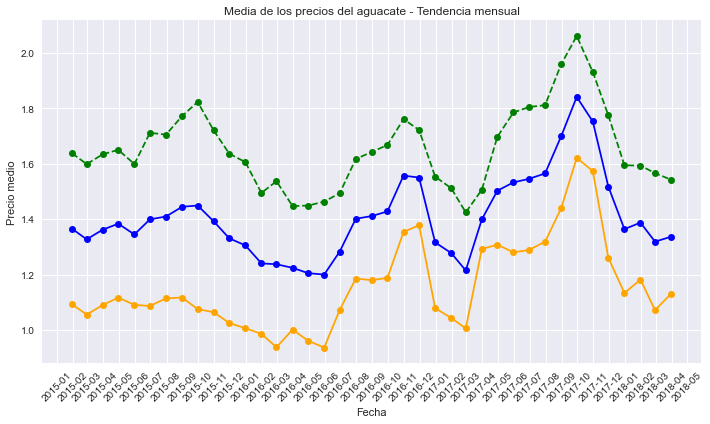

In [15]:
# Agrupar por mes y calcular la media mensual
monthly_avg_all = df.groupby(pd.Grouper(key='Date', freq='M')).agg({'AveragePrice': 'mean'}).reset_index()
monthly_avg_con = df_conventional.groupby(pd.Grouper(key='Date', freq='M')).agg({'AveragePrice': 'mean'}).reset_index()
monthly_avg_org = df_organic.groupby(pd.Grouper(key='Date', freq='M')).agg({'AveragePrice': 'mean'}).reset_index()


# Plot de la media mensual
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_con['Date'], monthly_avg_con['AveragePrice'], color='orange', marker='o', linestyle='-', label='Conventional')
plt.plot(monthly_avg_org['Date'], monthly_avg_org['AveragePrice'], color='green', marker='o', linestyle='--', label='Organic')


plt.plot(monthly_avg_all['Date'], monthly_avg_all['AveragePrice'], color='blue', marker='o', linestyle='-')
plt.title("Media de los precios del aguacate - Tendencia mensual")
plt.xlabel("Fecha")
plt.ylabel("Precio medio")

# Formato para mostrar los meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.grid(True)
plt.show()

4. **Tendencia de Ventas a lo Largo del Tiempo:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.

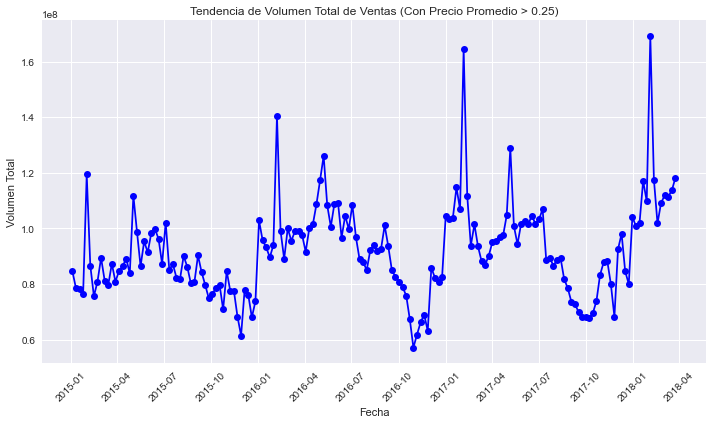

In [16]:
# Filtrar para no considerar los valores menores a 0.25
df_filtered = df[df['AveragePrice'] > 0]

# Agrupar 'Date' y sumar 'Total Volume' para cada fecha
total_volume_by_date = df.groupby('Date')['Total Volume'].sum().reset_index()

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(total_volume_by_date['Date'], total_volume_by_date['Total Volume'], color='blue', marker='o', linestyle='-')
plt.title("Tendencia de Volumen Total de Ventas (Con Precio Promedio > 0.25)")
plt.xlabel("Fecha")
plt.ylabel("Volumen Total")

# Format the x-axis to show months and years
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.grid(True)
plt.show()

5. **Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.

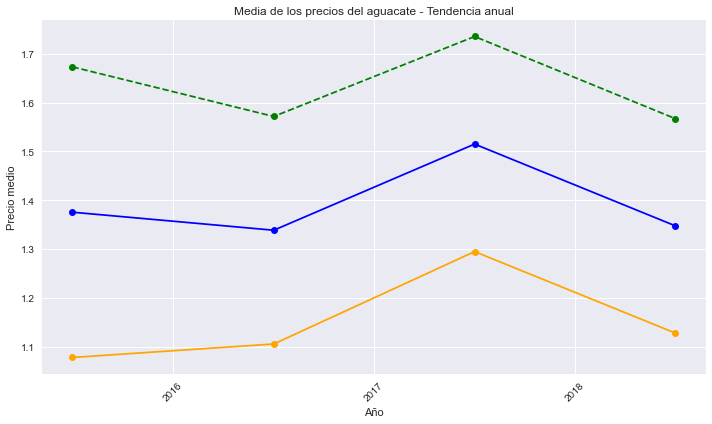

In [9]:
# Agrupar por año y calcular la media anual
year_avg_all = df.groupby(pd.Grouper(key='Date', freq='Y')).agg({'AveragePrice': 'mean'}).reset_index()
year_avg_con = df_conventional.groupby(pd.Grouper(key='Date', freq='Y')).agg({'AveragePrice': 'mean'}).reset_index()
year_avg_org = df_organic.groupby(pd.Grouper(key='Date', freq='Y')).agg({'AveragePrice': 'mean'}).reset_index()

# Plot de la media anual
plt.figure(figsize=(10, 6))
plt.plot(year_avg_con['Date'], year_avg_con['AveragePrice'], color='orange', marker='o', linestyle='-', label='Conventional')
plt.plot(year_avg_org['Date'], year_avg_org['AveragePrice'], color='green', marker='o', linestyle='--', label='Organic')


plt.plot(year_avg_all['Date'], year_avg_all['AveragePrice'], color='blue', marker='o', linestyle='-')
plt.title("Media de los precios del aguacate - Tendencia anual")
plt.xlabel("Año")
plt.ylabel("Precio medio")

# Formato para mostrar los meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.grid(True)
plt.show()

### 2. **Gráficos para Visualización de Datos**
**Resumen:** La visualización de datos es clave para identificar patrones y relaciones entre diferentes variables. Los gráficos apropiados pueden proporcionar información valiosa sobre el comportamiento de los precios y volúmenes de ventas.

1. **Gráfico de Violín de Volumen de Ventas por Región:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `region`.
   - **Esperado:** Visualiza la distribución de ventas en diferentes regiones.
     - Utiliza la función `violinplot` de `seaborn` para crear gráficos de violín.
     - Configura los ejes para mostrar la relación entre `Total Volume` y `region`.
     - Añade etiquetas y títulos usando `plt.title()` y `plt.xlabel()` para facilitar la interpretación.

2. **Boxplot Comparativo de Precios entre Años:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Genera boxplots para comparar la distribución de precios.
     - Utiliza `boxplot` de `seaborn` para crear boxplots que comparen `AveragePrice` entre diferentes años.
     - Asegúrate de que cada boxplot represente un año diferente.
     - Incluye etiquetas y títulos descriptivos usando `plt.title()`.

3. **Histograma de Volumen Total de Ventas:**
   - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.

4. **Gráfico de Barras de Ventas por Tipo de Bolsa:**
   - **Uso de Datos:** Utiliza las columnas `Total Bags`, `Small Bags`, `Large Bags` y `XLarge Bags`.
   - **Esperado:** Compara las ventas de diferentes tipos de bolsas.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `sum()`.
     - Crea un gráfico de barras con `plt.bar()` para mostrar las diferencias en ventas.
     - Asegúrate de incluir etiquetas para cada tipo de bolsa.

5. **Gráfico de Líneas de Precios Promedios por Año:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice` y `year`.
   - **Esperado:** Visualiza la tendencia de precios promedio a lo largo de los años.
     - Agrupa los datos por `year` y calcula el promedio de `AveragePrice`.
     - Usa `plt.plot()` para crear un gráfico de líneas que muestre la evolución de precios.
     - Añade un título y etiquetas descriptivas a los ejes usando `plt.title()` y `plt.xlabel()`.

### 3. **Elasticidad del Precio**
**Resumen:** El análisis de elasticidad precio-demanda permite evaluar cómo los cambios en los precios afectan la demanda de aguacates. Comprender la elasticidad puede ayudar a formular estrategias de precios más efectivas.

La fórmula de elasticidad precio-demanda es:

$$
E_d = \frac{\% \text{Cambio en la cantidad demandada}}{\% \text{Cambio en el precio}} = \frac{\Delta Q / Q}{\Delta P / P}
$$

1. **Elasticidad Precio-Demanda por Año:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda para cada año.
     - Calcula la variación porcentual de `Total Volume` y `AveragePrice` utilizando `pd.pct_change()`.
     - Utiliza la fórmula de elasticidad para determinar la sensibilidad de la demanda respecto al precio.
     - Presenta los resultados en un gráfico de líneas usando `plt.plot()` para mostrar la elasticidad por año.

2. **Comparación de Elasticidad en Diferentes Mercados:**
   - **Uso de Datos:** Utiliza las columnas `Total Volume` y `AveragePrice`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda en diferentes regiones.
     - Agrupa los datos por `region` y calcula la elasticidad para cada región utilizando `pd.pct_change()`.
     - Presenta un gráfico de barras que muestre la elasticidad por región usando `plt.bar()`.

3. **Elasticidad a Nivel de Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Bags`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda específica para cada tipo de bolsa.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `groupby()` y `sum()`.
     - Calcula la elasticidad para cada tipo y presenta los resultados en un gráfico comparativo usando `plt.bar()`.

4. **Análisis de Elasticidad Comparativa entre Orgánicos y Convencionales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `type`.
   - **Esperado:** Compara la elasticidad de la demanda entre aguacates orgánicos y convencionales.
     - Agrupa los datos por `type` y calcula la elasticidad utilizando `pd.pct_change()`.
     - Presenta un gráfico que muestre la diferencia en elasticidad entre los dos tipos usando `plt.bar()`.

5. **Análisis de la Elasticidad Precios-Ventas:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Examina cómo las variaciones en `AveragePrice` afectan a `Total Volume`.
     - Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
     - Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando `plt.scatter()` y `plt.plot()`.

### 4. **Análisis de Cohortes**
**Resumen:** El análisis de cohortes permite agrupar datos según características específicas y observar cómo se comportan a lo largo del tiempo. Se centra en cohortes de precios y ventas para entender las dinámicas del mercado.

1. **Cohortes Basadas en Precios Promedios Trimestrales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `Date`.
   - **Esperado:** Crea cohortes trimestrales y analiza cambios en precios y volúmenes.
     - Agrupa los datos por trimestre usando `pd.Grouper` con `freq='Q'`.
     - Calcula el promedio de `AveragePrice` y suma `Total Volume` para cada cohorte.
     - Visualiza los resultados en un gráfico de líneas que muestre la evolución de las cohortes.

2. **Cohortes por Región y Fecha:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice`, `Total Volume`, `region` y `Date`.
   - **Esperado:** Analiza cómo varían las cohortes de diferentes regiones.
     - Agrupa los datos por `region` y `Date` usando `groupby()`.
     - Calcula el promedio de precios y volumen para cada cohorte.
     - Presenta los resultados en gráficos de barras que muestren comparaciones entre regiones.

3. **Análisis de Cohortes en Función del Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` y `Date`.
   - **Esperado:** Examina cómo se comportan las diferentes cohortes según el tipo de bolsa.
     - Agrupa los datos por tipo de bolsa y `Date`.
     - Calcula el volumen de ventas total y muestra los resultados en un gráfico de líneas.

4. **Cohortes de Clientes Basadas en Ventas:**
   - **Uso de Datos:** Usa las columnas `Total Volume`, `Date` y `region`.
   - **Esperado:** Analiza el comportamiento de las cohortes según el volumen de ventas.
     - Clasifica los clientes según su volumen de compras.
     - Visualiza las cohortes en gráficos de líneas o barras que muestren el comportamiento de compra a lo largo del tiempo.

5. **Evaluación de Retención de Ventas por Cohorte:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Estudia cómo se retienen las ventas en cohortes a lo largo de un año.
     - Agrupa los datos por mes y cohortes.
     - Calcula la retención de ventas y visualiza los resultados en un gráfico de líneas que muestre las tasas de retención.

### 5. **Análisis de Correlación y Regresión**
**Resumen:** Se centra en la identificación de relaciones significativas entre las variables numéricas y el desarrollo de modelos de regresión para hacer predicciones basadas en esas relaciones.

1. **Matriz de Correlación:** 
   - **Uso de Datos:** Utiliza las columnas numéricas del DataFrame (p. ej., `AveragePrice`, `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`).
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Calcula la matriz de correlación usando el método `.corr()` del DataFrame.
     - Visualiza la matriz utilizando `sns.heatmap()`. 
     - Anota las correlaciones más significativas y discute su posible impacto en el análisis.

2. **Análisis de Dispersión entre Variables Clave:** 
   - **Uso de Datos:** Selecciona variables numéricas de interés como `AveragePrice` y `Total Volume`.
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Crea un gráfico de dispersión con `sns.scatterplot()` para visualizar la relación entre `AveragePrice` y `Total Volume`.
     - Añade una línea de regresión utilizando `sns.regplot()` para ilustrar las tendencias.
     - Compara el ajuste de una regresión lineal frente a una polinómica.

3. **Predicciones Mensuales Usando Datos Trimestrales:**
   - **Uso de Datos:** Agrupa datos por trimestres y segmenta en meses utilizando `Date`, `AveragePrice`, y `Total Volume`.
   - **Esperado:** 
     - Convierte la columna `Date` a tipo datetime si es necesario.
     - Agrupa los datos por trimestre y calcula el promedio de `AveragePrice` y `Total Volume`.
     - Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

4. **Predicciones Trimestrales:**
   - **Uso de Datos:** Agrupa los datos en trimestres usando solo variables numéricas.
   - **Esperado:** 
     - Agrupa los datos por trimestres usando `pd.Grouper()` con `freq='Q'` para obtener promedios.
     - Usa los datos de 1 o 2 trimestres anteriores para predecir el siguiente trimestre ajustando modelos de regresión lineal y polinómica.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

5. **Predicciones Anuales:**
   - **Uso de Datos:** Agrupa los datos en años, utilizando únicamente columnas numéricas.
   - **Esperado:** 
     - Agrupa los datos por año utilizando `pd.Grouper()` con `freq='Y'`.
     - Usa los datos de 1 o 2 años anteriores para predecir el siguiente año ajustando modelos de regresión lineal y polinómica.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

6. **Desarrollo de Modelos de Regresión Múltiple:** 
   - **Uso de Datos:** Selecciona varias variables numéricas como `Total Volume`, `4046`, `4225`, `4770`, y `Total Bags` para predecir `AveragePrice`.
   - **Esperado:** 
     - Define las variables independientes (X) y dependientes (y).
     - Ajusta modelos de regresión múltiple.
     - Compara su rendimiento utilizando métricas como R² y RMSE y discute las implicaciones de los resultados.

7. **Análisis de Coeficientes de Regresión Múltiple:**
   - **Uso de Datos:** Examina los coeficientes de los modelos de regresión múltiple ajustados.
   - **Esperado:** 
     - Extrae los coeficientes del modelo ajustado.
     - Interpreta los coeficientes para entender el impacto de cada variable numérica en `AveragePrice`.
     - Comenta sobre las variables más significativas y su relevancia.

8. **Modelos de Regresión para Diferenciar Volúmenes de Ventas:**
   - **Uso de Datos:** Usa `AveragePrice`, `Total Volume`, `4046`, `4225`, y `4770`.
   - **Esperado:** 
     - Ajusta modelos de regresión para analizar cómo los diferentes volúmenes de ventas afectan `AveragePrice`.
     - Compara los resultados de regresión lineal y polinómica.
     - Presenta las conclusiones de tus análisis.

9. **Análisis de la Influencia de las Ventas Totales en el Precio Promedio:**
   - **Uso de Datos:** Usa `Total Volume`, `AveragePrice`, y `Total Bags`.
   - **Esperado:** 
     - Ajusta un modelo de regresión lineal y polinómica para ver cómo varía `AveragePrice` en función del volumen total de ventas.
     - Evalúa la significancia de los coeficientes y discute su relevancia.

10. **Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo:**
    - **Uso de Datos:** Usa `AveragePrice`, `4046`, `4225`, `4770`, y `Total Volume`.
    - **Esperado:** 
      - Ajusta modelos de regresión lineal y polinómica.
      - Evalúa la efectividad de ambos modelos utilizando métricas como R² y RMSE.
      - Discute cuál modelo ofrece mejores predicciones y por qué, basándote en los resultados obtenidos.
